In [1]:
import pandas as pd
import seafront.fetch
import seafront.standardize
import seafront.plot_qc
import seafront.meta


import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Select, filter and download datasets

## A. Filter cellxgene for good aging datasets

I download the entire tabula sapiens dataset and summarize it into a table:

- Each row in the output = one unique `dataset_id`.
- Numeric columns (e.g. `n_measured_vars`, `raw_sum`) summarized as **median** per dataset.
- Categorical columns (e.g. `cell_type`, `assay`, `tissue`) summarized as **comma-separated lists of unique values**.
- Ontology ID columns summarized as unique values (comma-separated).
- Irrelevant columns (e.g. cell-level join ids) are excluded.


In [2]:
obs = seafront.meta.load_census_obs()

# standardize assay names
print("Number of unique single cell technologies:", len(obs["assay"].unique()))
obs_filtered = seafront.standardize.map_assay_simple(obs) 
obs_filtered["assay_simple"] = obs_filtered["assay_simple"].cat.remove_unused_categories()
obs_filtered["experiment"] = obs_filtered["dataset_id"].astype(str) + "__" + obs_filtered["assay_simple"].astype(str)
print("number of unique single cell technologies (simplified):", len(obs_filtered["assay_simple"].unique()))

summary = seafront.standardize.summarize_obs(obs_filtered)
summary.to_parquet("meta/cellxgene_human_dataset_overview.parquet", index=False)

Number of unique single cell technologies: 29
number of unique single cell technologies (simplified): 24


# --> summary table of all cellxgene datasets that we'll use to filter useful datasets

In [3]:
summary

,experiment,unique_dataset_ids_present,unique_assays_present,unique_assay_ontology_term_ids_present,unique_cell_types_present,unique_cell_type_ontology_term_ids_present,unique_development_stages_present,unique_development_stage_ontology_term_ids_present,unique_diseases_present,unique_disease_ontology_term_ids_present,...,unique_tissue_ontology_term_ids_present,unique_tissue_types_present,unique_tissue_generals_present,unique_tissue_general_ontology_term_ids_present,median_raw_sum,median_nnz,median_raw_mean_nnz,median_raw_variance_nnz,median_n_measured_vars,unique_assay_simples_present
0,0041b9c3-6a49-4bf7-8514-9bc7190067a7__10x_3_prime,0041b9c3-6a49-4bf7-8514-9bc7190067a7,10x 3' v3,EFO:0009922,"CD4-positive, alpha-beta T cell, CD8-positive,...","CL:0000057, CL:0000066, CL:0000084, CL:0000097...","33-year-old stage, 45-year-old stage, 59-year-...","HsapDv:0000127, HsapDv:0000139, HsapDv:0000153...",normal,PATO:0000461,...,"UBERON:0001416, UBERON:0001868, UBERON:0002097...",tissue,"mucosa, skin of body","UBERON:0000344, UBERON:0002097",8142.0,2335.0,3.511617,1.623706e+02,61759.0,10x_3_prime
1,0041b9c3-6a49-4bf7-8514-9bc7190067a7__Smart-seq2,0041b9c3-6a49-4bf7-8514-9bc7190067a7,Smart-seq2,EFO:0008931,"B cell, CD4-positive, alpha-beta T cell, CD8-p...","CL:0000057, CL:0000066, CL:0000084, CL:0000097...","33-year-old stage, 59-year-old stage, 61-year-...","HsapDv:0000127, HsapDv:0000153, HsapDv:0000155",normal,PATO:0000461,...,"UBERON:0001416, UBERON:0001868",tissue,skin of body,UBERON:0002097,1081025.0,2017.0,556.118067,3.233954e+06,61759.0,Smart-seq2
2,00476f9f-ebc1-4b72-b541-32f912ce36ea__10x_3_prime,00476f9f-ebc1-4b72-b541-32f912ce36ea,10x 3' v3,EFO:0009922,"astrocyte, central nervous system macrophage, ...","CL:0000057, CL:0000065, CL:0000115, CL:0000127...",42-year-old stage,HsapDv:0000136,normal,PATO:0000461,...,UBERON:0001898,tissue,brain,UBERON:0000955,18140.0,6000.0,3.014302,8.115486e+01,59236.0,10x_3_prime
3,00593d17-0693-4646-acad-89dbefba11bb__10x_3_prime,00593d17-0693-4646-acad-89dbefba11bb,10x 3' v3,EFO:0009922,"adipocyte of omentum tissue, mesenchymal stem ...","CL:0002570, CL:0002615","24-year-old stage, 28-year-old stage, 29-year-...","HsapDv:0000118, HsapDv:0000122, HsapDv:0000123...",normal,PATO:0000461,...,UBERON:0035818,tissue,adipose tissue,UBERON:0001013,3283.0,1850.0,1.783555,3.456583e+01,36406.0,10x_3_prime
4,0087cde2-967d-4f7c-8e6e-40e4c9ad1891__10x_3_prime,0087cde2-967d-4f7c-8e6e-40e4c9ad1891,10x 3' v3,EFO:0009922,L2/3-6 intratelencephalic projecting glutamate...,CL:4023040,adult stage,HsapDv:0000258,normal,PATO:0000461,...,UBERON:0001950,tissue,brain,UBERON:0000955,22004.0,5542.0,3.951849,4.911152e+02,18786.0,10x_3_prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,fe52003e-1460-4a65-a213-2bb1a508332f__10x_5_prime,fe52003e-1460-4a65-a213-2bb1a508332f,"10x 5' v1, 10x 5' v2","EFO:0009900, EFO:0011025","alveolar macrophage, classical monocyte, conve...","CL:0000235, CL:0000583, CL:0000860, CL:0000875...","eighth decade stage, seventh decade stage, six...","HsapDv:0000240, HsapDv:0000241, HsapDv:0000242",normal,PATO:0000461,...,"UBERON:0000030, UBERON:0000178, UBERON:0000400...",tissue,"blood, bone marrow, colon, endocrine gland, la...","UBERON:0000029, UBERON:0000030, UBERON:0000178...",5617.0,1874.0,3.007549,9.884159e+01,36398.0,10x_5_prime
1089,ff45e623-7f5f-46e3-b47d-56be0341f66b__10x_3_prime,ff45e623-7f5f-46e3-b47d-56be0341f66b,10x 3' v3,EFO:0009922,"B cell, CD4-positive, alpha-beta T cell, CD8-p...","CL:0000057, CL:0000084, CL:0000097, CL:0000115...","37-year-old stage, 56-year-old stage, 59-year-...","HsapDv:0000131, HsapDv:0000150, HsapDv:0000153",normal,PATO:0000461,...,"UBERON:0000016, UBERON:0000017",tissue,pancreas,UBERON:0001264,15527.5,3715.5,4.002467,3.117672e+02,61759.0,10x_3_prime
1090,ff4cfa86-9c0c-4b7c-abd6-90547657d04f__10x_3_prime,ff4cfa86-9c0c-4b7c-abd6-90547657d04f,10x 3' v3,EFO:0009922,"T cell, blood vessel endothelial cell, blood v..."

# --> Filter out some experiments based on low quality (low counts)

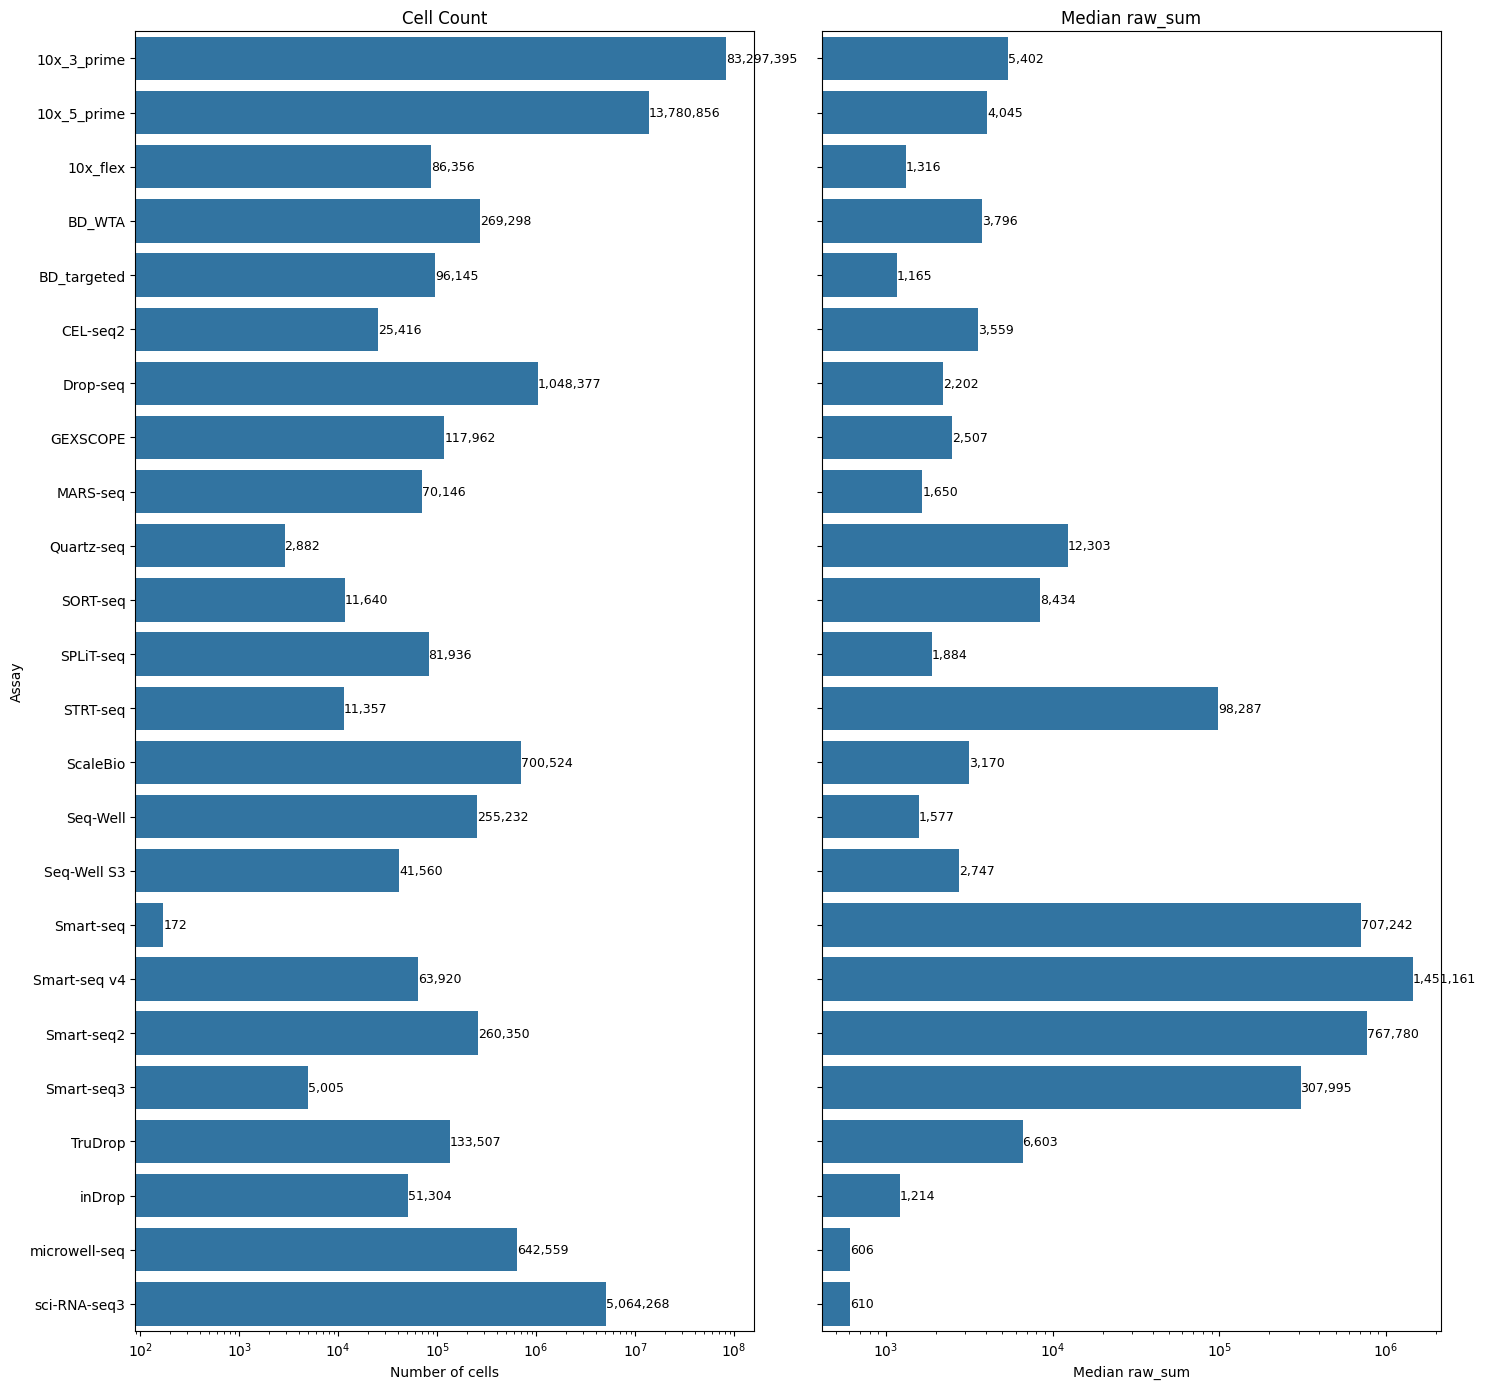

In [4]:
tech_summary = seafront.plot_qc.plot_assay_counts_and_medians(obs_filtered, var="assay_simple", return_df=True)
plt.show()

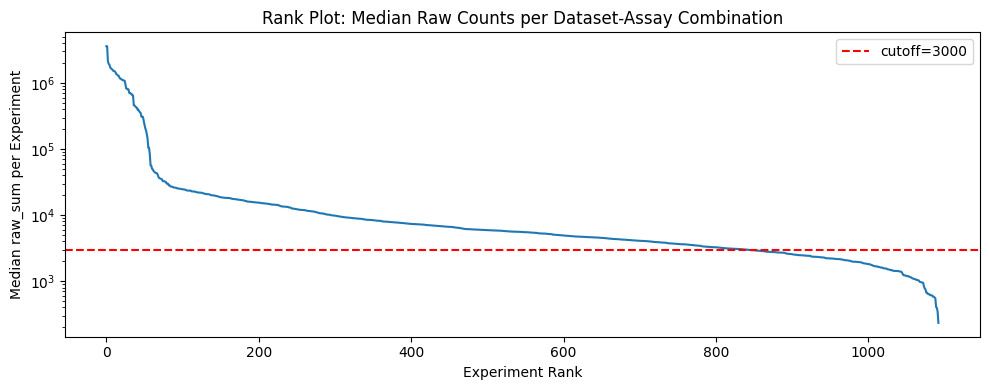

In [5]:
median_df = seafront.plot_qc.plot_ranked_median_counts_per_experiment(obs_filtered, return_df=True, cutoff=3000)
plt.show()

### --> Filter out any experiment (= unique combination of dataset_id and assay) with median counts lower than 3000 (arbitrary and adjustable)

In [7]:
obs_filtered, summary_filtered = filter_experiments_by_median_raw_sum(obs_filtered, threshold=3000)


### --> Filter out ambiguous or unclear age entries and convert strings to int ages

In [9]:
print("total unique 'age nomenclatures':", len(summary["unique_development_stages_present"].unique()))
print("\n")
print("Example:")
print(summary["unique_development_stages_present"].unique()[:5])

total unique 'age nomenclatures': 458


Example:
['33-year-old stage, 45-year-old stage, 59-year-old stage, 61-year-old stage'
 '33-year-old stage, 59-year-old stage, 61-year-old stage'
 '42-year-old stage'
 '24-year-old stage, 28-year-old stage, 29-year-old stage, 33-year-old stage, 34-year-old stage, 41-year-old stage, 48-year-old stage, 53-year-old stage, adult stage'
 'adult stage']


In [10]:
obs_filtered = seafront.standardize.filter_obs_with_age_int(obs_filtered)
summary_filtered = seafront.standardize.summarize_obs(obs_filtered)
n_patients_per_dataset = obs_filtered.groupby("dataset_id", observed=False)["age_int"].nunique()
print(f"We have {n_patients_per_dataset.sum()} total humans with valid ages in this dataset")

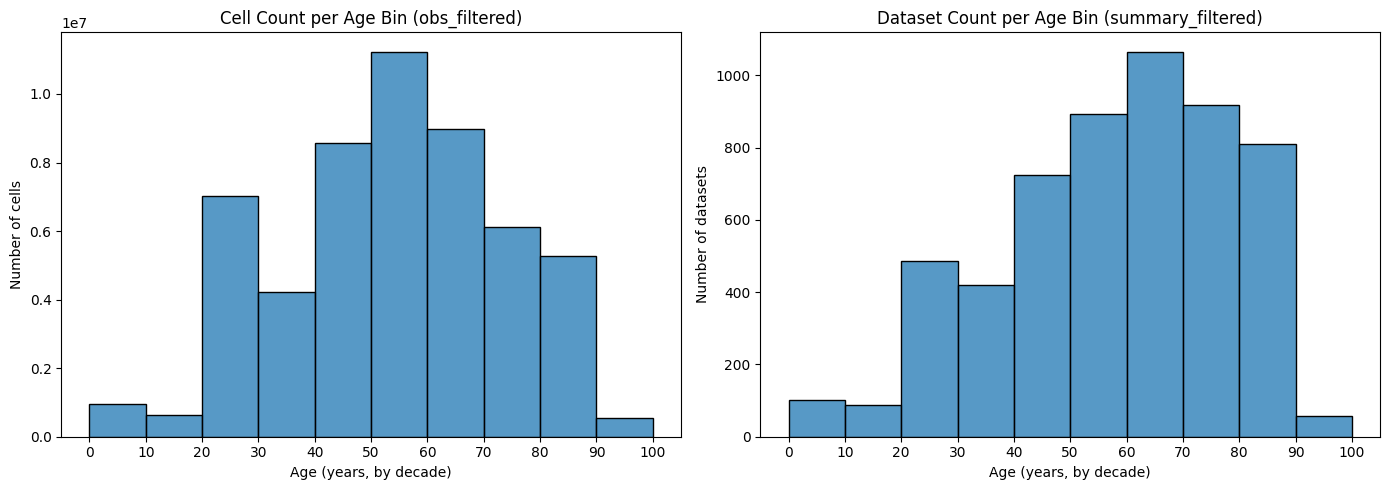

In [12]:
fig, axes = seafront.plot_qc.plot_age_histograms(obs_filtered, summary_filtered)
plt.show()

# --> this is the basic Cellxgene scaffold that I will now hook onto some other interesting datasets

# Collect the variable names, needed for integration with further datasets

In [13]:
seafront.meta.check_var_consistency_and_save(obs_filtered)

Checking gene consistency across: ['cf83c98a-3791-4537-bbde-a719f6d73c13', '70e4f35b-c98c-45a1-9aa9-2053b07315dd', '77044335-0ac5-4406-9b3f-8cdd3656d67b']


/data2/florian/hackathon/src/seafront/meta.py:50: FutureWarning: The argument `column_names` is deprecated and will be removed in a future release. Please use `obs_column_names` and `var_column_names` instead.
  adata = cellxgene_census.get_anndata(
/data2/florian/hackathon/src/seafront/meta.py:50: FutureWarning: The argument `column_names` is deprecated and will be removed in a future release. Please use `obs_column_names` and `var_column_names` instead.
  adata = cellxgene_census.get_anndata(


Dataset 70e4f35b-c98c-45a1-9aa9-2053b07315dd matches reference.


/data2/florian/hackathon/src/seafront/meta.py:50: FutureWarning: The argument `column_names` is deprecated and will be removed in a future release. Please use `obs_column_names` and `var_column_names` instead.
  adata = cellxgene_census.get_anndata(


Dataset 77044335-0ac5-4406-9b3f-8cdd3656d67b matches reference.
All datasets matched. Gene names written to: meta/census_var.txt


### 5. wholistic QC